In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:/KID/2023w2/econ326/project/marketing_campaign.csv",sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.drop(columns=["Z_CostContact","Z_Revenue","ID","Year_Birth",'Dt_Customer'], inplace= True)

In [6]:
missing=df.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
df["Income"].fillna(missing, inplace= True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

In [7]:
unique_marital_statuses = df['Marital_Status'].unique()
print(unique_marital_statuses)

unique_education = df['Education'].unique()
print(unique_education)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


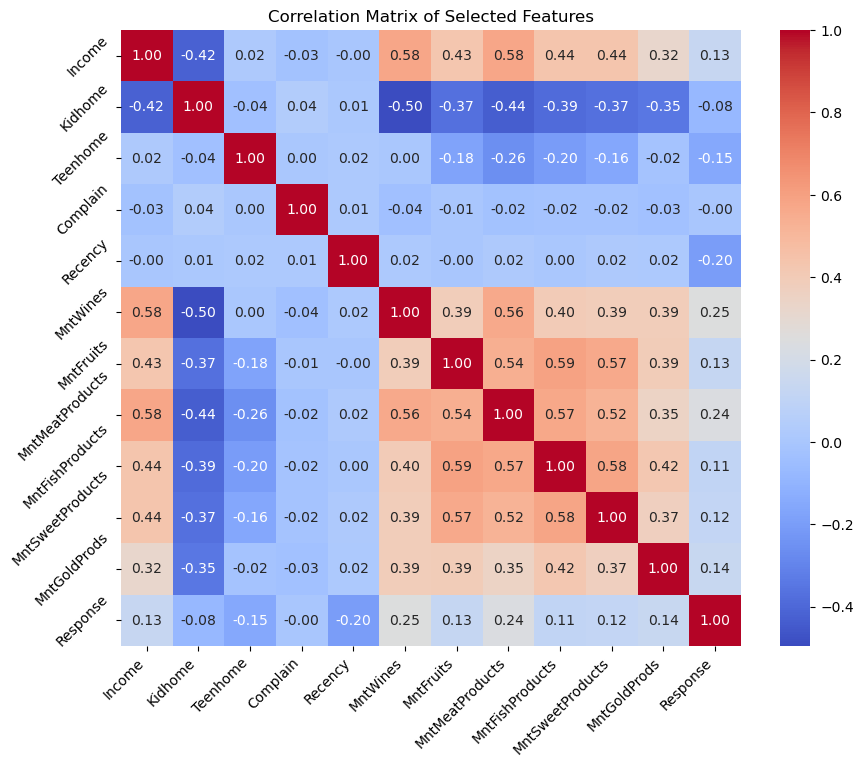

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'Income', 'Kidhome', 'Teenhome',  'Complain','Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Response'
]

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Selected Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()


In [9]:
df.drop(columns=["Recency"], inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [11]:

df['TotalAcceptedCmps'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)
df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], inplace= True)
df['TotalAcceptedCmps']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: TotalAcceptedCmps, Length: 2240, dtype: int64

In [12]:
statistics = df.describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52248.747768,25039.981164,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


Lasso


Cross-Validation

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV


X = df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntSweetProducts'], axis=1)
y_variables = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntSweetProducts']
X = pd.get_dummies(X)

import numpy as np
from sklearn.linear_model import LassoCV

alphas = np.linspace(0, 10, 100)  

lasso_model = LassoCV(alphas=alphas, cv=5)


best_alpha_values = {}

for y_variable in y_variables:
    y = df[y_variable]  
    lasso_model.fit(X, y)
    best_alpha_values[y_variable] = lasso_model.alpha_

for y_variable, best_alpha in best_alpha_values.items():
    print(f"Best alpha for {y_variable}: {best_alpha}")



Best alpha for MntWines: 0.7070707070707071
Best alpha for MntFruits: 0.10101010101010101
Best alpha for MntMeatProducts: 1.8181818181818181
Best alpha for MntFishProducts: 0.20202020202020202
Best alpha for MntGoldProds: 0.30303030303030304
Best alpha for MntSweetProducts: 0.10101010101010101


Lasso


wine

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f

categorical_features = ['Education', 'Marital_Status', 'Complain', 'Response']

feature_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),  
    ('num', StandardScaler(), [col for col in df.columns if col not in categorical_features + ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']])
], remainder='passthrough')

X_feature = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts'], axis=1)
y_wine = df['MntWines']

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_wine, test_size=0.2, random_state=42)

X_train_transformed = feature_transform.fit_transform(X_train)
X_test_transformed = feature_transform.transform(X_test)

lasso = Lasso(alpha=0.7070)
lasso.fit(X_train_transformed, y_train)

y_pred = lasso.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f"R^2 Score: {r2}")

feature_names = feature_transform.get_feature_names_out()
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef}")
print("Intercept:", lasso.intercept_)


Mean Squared Error: 38820.21741865176
R^2 Score: 0.6688046985308045
cat__Education_2n Cycle: -34.31388379578075
cat__Education_Basic: -0.0
cat__Education_Graduation: -0.0
cat__Education_Master: 61.080155405351306
cat__Education_PhD: 80.47620509470897
cat__Marital_Status_Absurd: -0.0
cat__Marital_Status_Alone: -0.0
cat__Marital_Status_Divorced: 0.0
cat__Marital_Status_Married: -0.28405474527176194
cat__Marital_Status_Single: -0.0
cat__Marital_Status_Together: 8.052259216698381
cat__Marital_Status_Widow: -0.0
cat__Marital_Status_YOLO: -0.0
cat__Complain_0: 0.0
cat__Complain_1: -0.0
cat__Response_0: 9.79678138914677
cat__Response_1: -5.034580400517377e-15
num__Income: 36.95381567992871
num__Kidhome: -27.326066315545095
num__Teenhome: 0.0
num__NumDealsPurchases: -9.877136241236478
num__NumWebPurchases: 50.37076986083815
num__NumCatalogPurchases: 89.81857228772017
num__NumStorePurchases: 106.91456818569513
num__NumWebVisitsMonth: 39.22372746865204
num__TotalAcceptedCmps: 100.5848538688728
I

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.091)
ridge.fit(X_train_transformed, y_train)

y_pred = ridge.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
feature_names = feature_transform.get_feature_names_out()
for name, coef in zip(feature_names, ridge.coef_):
    print(f"{name}: {coef}")
print("Intercept:", ridge.intercept_)


Mean Squared Error: 38980.466714723654
R^2 Score: 0.6674375291162084
cat__Education_2n Cycle: -60.928533565599
cat__Education_Basic: -31.42184310123325
cat__Education_Graduation: -19.618435399661614
cat__Education_Master: 46.7565310575684
cat__Education_PhD: 65.21228101775456
cat__Marital_Status_Absurd: -239.4625324696999
cat__Marital_Status_Alone: 32.60460099911713
cat__Marital_Status_Divorced: 46.58690944782041
cat__Marital_Status_Married: 37.37545041377747
cat__Marital_Status_Single: 39.38156660575582
cat__Marital_Status_Together: 50.1540632205562
cat__Marital_Status_Widow: 33.25079637110006
cat__Marital_Status_YOLO: 0.1091454112128059
cat__Complain_0: 15.972499100585788
cat__Complain_1: -15.972499100604175
cat__Response_0: 9.482322639525302
cat__Response_1: -9.482322637678987
num__Income: 37.05544526864005
num__Kidhome: -27.59828046013546
num__Teenhome: -0.5118314916787096
num__NumDealsPurchases: -11.388434850347494
num__NumWebPurchases: 50.588872395631164
num__NumCatalogPurchases:

meat

In [25]:
X_feature = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts'], axis=1)
y_meat = df['MntMeatProducts']

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_meat, test_size=0.2, random_state=42)

X_train_transformed = feature_transform.fit_transform(X_train)
X_test_transformed = feature_transform.transform(X_test)

lasso = Lasso(alpha=1.8181)
lasso.fit(X_train_transformed, y_train)

y_pred = lasso.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f"R^2 Score: {r2}")

feature_names = feature_transform.get_feature_names_out()
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef}")
print("Intercept:", lasso.intercept_)


Mean Squared Error: 17186.43619815232
R^2 Score: 0.6041565000511935
cat__Education_2n Cycle: 0.0
cat__Education_Basic: -0.0
cat__Education_Graduation: 9.40775794306103
cat__Education_Master: 0.0
cat__Education_PhD: -0.0
cat__Marital_Status_Absurd: -0.0
cat__Marital_Status_Alone: -0.0
cat__Marital_Status_Divorced: -0.0
cat__Marital_Status_Married: -0.0
cat__Marital_Status_Single: 5.989805741611829
cat__Marital_Status_Together: 0.0
cat__Marital_Status_Widow: -0.0
cat__Marital_Status_YOLO: 0.0
cat__Complain_0: 0.0
cat__Complain_1: -0.0
cat__Response_0: -29.783347228590156
cat__Response_1: 2.617981808269036e-13
num__Income: 35.055849783406266
num__Kidhome: -9.352217415875849
num__Teenhome: -43.08952312161618
num__NumDealsPurchases: 3.1150067681532208
num__NumWebPurchases: 4.117301567535976
num__NumCatalogPurchases: 108.28150356265029
num__NumStorePurchases: 13.681947702060695
num__NumWebVisitsMonth: -31.075856424963483
num__TotalAcceptedCmps: 4.299295837050947
Intercept: 186.49987289536176

gold

In [26]:
X_feature = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts'], axis=1)
y_gold = df['MntGoldProds']

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_gold, test_size=0.2, random_state=42)

X_train_transformed = feature_transform.fit_transform(X_train)
X_test_transformed = feature_transform.transform(X_test)

lasso = Lasso(alpha=0.3030)
lasso.fit(X_train_transformed, y_train)

y_pred = lasso.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f"R^2 Score: {r2}")

feature_names = feature_transform.get_feature_names_out()
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef}")
print("Intercept:", lasso.intercept_)


Mean Squared Error: 1962.2819325473426
R^2 Score: 0.2847708865230433
cat__Education_2n Cycle: 0.0
cat__Education_Basic: 0.0
cat__Education_Graduation: 2.176481479059247
cat__Education_Master: -3.713913403963577
cat__Education_PhD: -16.471663244432285
cat__Marital_Status_Absurd: 0.0
cat__Marital_Status_Alone: -0.0
cat__Marital_Status_Divorced: 0.0
cat__Marital_Status_Married: -1.032237594712878
cat__Marital_Status_Single: 0.0
cat__Marital_Status_Together: -0.3156839629054129
cat__Marital_Status_Widow: 0.0
cat__Marital_Status_YOLO: -0.0
cat__Complain_0: 0.0
cat__Complain_1: -0.0
cat__Response_0: -7.034887563977248
cat__Response_1: 3.3228230643414686e-14
num__Income: -0.0
num__Kidhome: -4.417040066087092
num__Teenhome: -1.916759489214088
num__NumDealsPurchases: 1.6887354566805293
num__NumWebPurchases: 13.641927825132552
num__NumCatalogPurchases: 9.769964618016205
num__NumStorePurchases: 5.204679557552615
num__NumWebVisitsMonth: -3.600459975458094
num__TotalAcceptedCmps: 0.3615825390232501

sweet


In [27]:
X_feature = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts'], axis=1)
y_sweet = df['MntSweetProducts']

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_sweet, test_size=0.2, random_state=42)

X_train_transformed = feature_transform.fit_transform(X_train)
X_test_transformed = feature_transform.transform(X_test)

lasso = Lasso(alpha=0.1010)
lasso.fit(X_train_transformed, y_train)

y_pred = lasso.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f"R^2 Score: {r2}")

feature_names = feature_transform.get_feature_names_out()
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef}")
print("Intercept:", lasso.intercept_)


Mean Squared Error: 1036.2198903262504
R^2 Score: 0.39362002519451145
cat__Education_2n Cycle: 3.762989885608212
cat__Education_Basic: 0.0
cat__Education_Graduation: 0.0
cat__Education_Master: -9.444798604593707
cat__Education_PhD: -12.829699164457397
cat__Marital_Status_Absurd: -0.0
cat__Marital_Status_Alone: -0.0
cat__Marital_Status_Divorced: 0.842367430044702
cat__Marital_Status_Married: -0.059182446479249314
cat__Marital_Status_Single: 0.0
cat__Marital_Status_Together: -1.4792359882275312
cat__Marital_Status_Widow: 5.285377626258771
cat__Marital_Status_YOLO: -0.0
cat__Complain_0: 0.0
cat__Complain_1: -0.0
cat__Response_0: -2.5378871541331653
cat__Response_1: 5.034580400517377e-15
num__Income: 3.240883083620642
num__Kidhome: -1.3352937737711827
num__Teenhome: -4.794499272700885
num__NumDealsPurchases: -1.6358287945905108
num__NumWebPurchases: 8.595375911317829
num__NumCatalogPurchases: 7.5035309773409775
num__NumStorePurchases: 5.705353958437948
num__NumWebVisitsMonth: -6.9648127368